# Sentimental Analysis of Tweets using Python

## Project of Summer Interniship 2020 at IIT Kanpur

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

df1 = pd.read_csv(r'C:\Users\kaust\OneDrive\Desktop\NLP Project\train.txt') 

In [2]:
df1.head() 

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [3]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1["sentiment"] = label_encoder.fit_transform(df1["sentiment"]) 

In [4]:
df1.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,2,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,0,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,0,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,0,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,1,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [5]:
print(len(df1[df1.sentiment == 0]), 'Negative')
print(len(df1[df1.sentiment == 1]), 'Neutral')
print(len(df1[df1.sentiment == 2]), 'Positive')

3387 Negative
9014 Neutral
9064 Positive


**Preprocessing**

In [6]:

import nltk
from sklearn import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, f1_score 

**Preprocessing the tweet column**

In [7]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets


In [8]:
df1['normalized_text'] = df1.tweet_text.apply(normalizer)

**Extracting words with hashtag for further analysis**

In [9]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [10]:
df1['hashtag'] = df1.tweet_text.apply(extract_hashtag)

In [11]:
df1.head()

,tweet_id,sentiment,tweet_text,normalized_text,hashtag
0,264183816548130816,2,Gas by my house hit $3.39!!!! I\u2019m going t...,gas house hit u going chapel hill sat,
1,263405084770172928,0,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott still shit u c watch rafa johnny ...,
2,262163168678248449,0,its not that I\u2019m a GSP fan\u002c i just h...,u gsp fan u c hate nick diaz u wait february,
3,264249301910310912,0,Iranian general says Israel\u2019s Iron Dome c...,iranian general say israel u iron dome u deal ...,
4,262682041215234048,1,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran u c mon amour obama tried establish tie...,


**To Create Cloud of words for all words**

In [12]:
# all tweets 
all_words = " ".join(df1.normalized_text)
#print(all_all_words)


In [13]:

negative_words = " ".join(df1[df1['sentiment']==0].normalized_text)
neutral_words = " ".join(df1[df1['sentiment']==1].normalized_text)
positive_words = " ".join(df1[df1['sentiment']==2].normalized_text)


**All tweets cloudword**

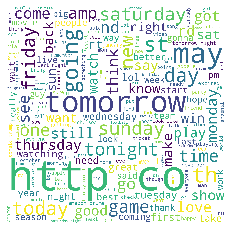

In [14]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

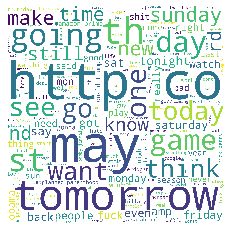

In [15]:
wordcloud_0 = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(negative_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Analysing Hashtag words**

**plotting the most common hashtag used in tweets**
**all hashtag 
hatred hashtag**

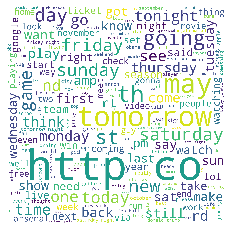

In [16]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(neutral_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

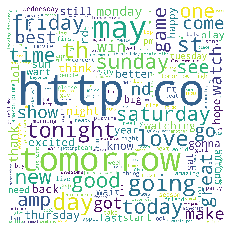

In [17]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(positive_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)


In [19]:
freq_negative_hashtag = FreqDist(list((" ".join(df1[df1['sentiment']==0]['hashtag'])).split())).most_common(10)
freq_neutral_hashtag = FreqDist(list((" ".join(df1[df1['sentiment']==1]['hashtag'])).split())).most_common(10)
freq_positive_hashtag = FreqDist(list((" ".join(df1[df1['sentiment']==2]['hashtag'])).split())).most_common(10)


In [20]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_negative_hashtag = pd.DataFrame(freq_negative_hashtag, columns=['words', 'frequency'])
df_neutral_hashtag = pd.DataFrame(freq_neutral_hashtag, columns=['words', 'frequency'])
df_positive_hashtag = pd.DataFrame(freq_positive_hashtag, columns=['words', 'frequency'])

In [21]:
len(df1)

21465

In [22]:
# to create sparse matrix corpus is created to pass to vectorizer
corpus = []
for i in range(0,21465):
    corpus.append(df1['normalized_text'][i])
#corpus

In [23]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
# creating dense matrix
X = cv.transform(corpus).toarray()
y = df1.iloc[:,1].values

In [50]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Classification**

**Logistic Regression (Linear Model)******

In [51]:

classifier1 = LogisticRegression(C=12)
classifier1.fit(X_train, y_train)


C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [53]:
print(f1_score(y_test, y_pred, average = None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[0.41632653 0.61631899 0.66536094]
              precision    recall  f1-score   support

           0       0.47      0.38      0.42       678
           1       0.59      0.64      0.62      1823
           2       0.67      0.66      0.67      1792

    accuracy                           0.61      4293
   macro avg       0.58      0.56      0.57      4293
weighted avg       0.60      0.61      0.61      4293

[[ 255  295  128]
 [ 191 1167  465]
 [ 101  502 1189]]


**checking with TF-IDF vectorizer**
*** Unigram, bi gram is used wih min_df = 10*******

In [54]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.20, random_state=42)
classifier2 = LogisticRegression(C=12)
classifier2.fit(X1_train, y1_train)

C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [57]:
print(f1_score(y1_test, y1_pred, average = None))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

[0.41694915 0.63819754 0.67316801]
              precision    recall  f1-score   support

           0       0.49      0.36      0.42       678
           1       0.61      0.67      0.64      1823
           2       0.67      0.67      0.67      1792

    accuracy                           0.62      4293
   macro avg       0.59      0.57      0.58      4293
weighted avg       0.62      0.62      0.62      4293

[[ 246  288  144]
 [ 160 1218  445]
 [  96  488 1208]]


**a maximum f1 score of 0.63 is achieved at threshold of 0.5 
thus tweet with probability greater than or equal to 0.5 will be classified as hatred
since class distribution is imabalance we cannot use accurace as model performance evaluation method.**

**performing classification model on our test data** 

In [58]:
df2 = pd.read_csv(r'C:\Users\kaust\OneDrive\Desktop\NLP Project\test.txt')
df2.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,"Excuse the connectivity of this live stream, f..."


In [59]:
df2['normalized_text'] = df2['tweet_text'].apply(normalizer)


In [60]:
len(df2)

5398

In [61]:
# creating corpus
corpus_test = []
for i in range(0,5398):
    corpus_test.append(df2.normalized_text[i])
#corpus_test

In [62]:
Test_X = tfidf.transform(corpus_test)

In [63]:
pred_Y = classifier2.predict(Test_X)
prob_Y = classifier2.predict_proba(Test_X)

In [64]:
df2['pred_label'] = pred_Y


In [65]:
a =[]
for i in df2.tweet_id:
    a.append(i)

In [66]:
arr = np.array(a)

In [67]:
arr

array([264238274963451904, 218775148495515649, 258965201766998017, ...,
       259280987089932288, 201113950211940352, 237999067286876160],
      dtype=int64)

In [68]:
arr_2 =[]
for i in pred_Y:
    if i == 0:
        arr_2.append("negative")
    elif i == 1:
        arr_2.append("neutral")
    else:
        arr_2.append("positive")

In [69]:
out = np.array(arr_2)

In [70]:
out

array(['positive', 'positive', 'neutral', ..., 'neutral', 'positive',
       'positive'], dtype='<U8')

In [71]:
submission = pd.DataFrame({ 'tweet_id': df2.tweet_id, 'sentiment': out })
submission.to_csv("my_new_submission_3.csv", index=False)

In [72]:
submission.shape

(5398, 2)